In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 윈도우 : "Malgun Gothic"
# 맥 : "AppleGothic"
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

# 폰트설정
plt.rc("font", family=get_font_family())
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

In [3]:
df_last = pd.read_csv("./data/주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20210930.csv",encoding='cp949')

In [4]:
df_last.head()

,지역명,규모구분,연도,월,분양가격
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879


In [5]:
df_last.shape

(6120, 5)

In [6]:
df_first = pd.read_csv("./data/전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv",encoding='cp949')

In [7]:
df_first.shape

(17, 22)

In [8]:
df_first.head(3)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795


In [9]:
df_first.tail(3)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
14,경북,6168,6168,6234,6317,6412,6409,6554,6556,6563,...,6881,6989,6992,6953,6997,7006,6966,6887,7035,7037
15,경남,6473,6485,6502,6610,6599,6610,6615,6613,6606,...,7125,7332,7592,7588,7668,7683,7717,7715,7723,7665
16,제주,7674,7900,7900,7900,7900,7900,7914,7914,7914,...,7724,7739,7739,7739,7826,7285,7285,7343,7343,7343


In [10]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

In [11]:
df_last.isnull().sum()

지역명       0
규모구분      0
연도        0
월         0
분양가격    479
dtype: int64

In [12]:
df_first.isnull().sum()

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

In [13]:
df_last.isna().mean()*100

지역명     0.000000
규모구분    0.000000
연도      0.000000
월       0.000000
분양가격    7.826797
dtype: float64

<AxesSubplot:>

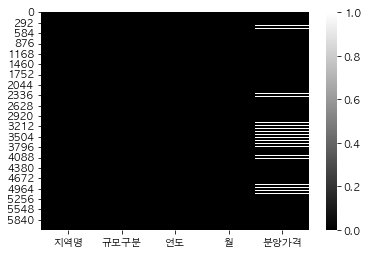

In [14]:
sns.heatmap(df_last.isnull(),cmap='gray')

In [15]:
df_last['분양가격'] = pd.to_numeric(df_last['분양가격'],errors='coerce')

In [16]:
df_last['평당분양가격'] = df_last['분양가격']*3.3

In [17]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     6120 non-null   object 
 1   규모구분    6120 non-null   object 
 2   연도      6120 non-null   int64  
 3   월       6120 non-null   int64  
 4   분양가격    5625 non-null   float64
 5   평당분양가격  5625 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 287.0+ KB


In [18]:
df_last['분양가격'].mean()

3459.3178666666668

In [19]:
df_last['분양가격'].describe()

count     5625.000000
mean      3459.317867
std       1411.776054
min       1868.000000
25%       2574.000000
50%       3067.000000
75%       3922.000000
max      13835.000000
Name: 분양가격, dtype: float64

In [20]:
df_last['규모구분'].unique()

array(['모든면적', '전용면적 60제곱미터이하', '전용면적 60제곱미터초과 85제곱미터이하',
       '전용면적 85제곱미터초과 102제곱미터이하', '전용면적 102제곱미터초과'], dtype=object)

In [21]:
df_last['전용면적'] = df_last['규모구분'].str.replace("전용면적|제곱면적|이하| ","", regex = True)
df_last['전용면적'] = df_last['전용면적'].str.replace("초과","~")
df_last[['규모구분','전용면적']].head()

,규모구분,전용면적
0,모든면적,모든면적
1,전용면적 60제곱미터이하,60제곱미터
2,전용면적 60제곱미터초과 85제곱미터이하,60제곱미터~85제곱미터
3,전용면적 85제곱미터초과 102제곱미터이하,85제곱미터~102제곱미터
4,전용면적 102제곱미터초과,102제곱미터~


In [22]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     6120 non-null   object 
 1   규모구분    6120 non-null   object 
 2   연도      6120 non-null   int64  
 3   월       6120 non-null   int64  
 4   분양가격    5625 non-null   float64
 5   평당분양가격  5625 non-null   float64
 6   전용면적    6120 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 334.8+ KB


In [23]:
df_last = df_last.drop(['규모구분','분양가격'],axis=1)

In [24]:

df_last.head()

,지역명,연도,월,평당분양가격,전용면적
0,서울,2015,10,19275.3,모든면적
1,서울,2015,10,18651.6,60제곱미터
2,서울,2015,10,19410.6,60제곱미터~85제곱미터
3,서울,2015,10,18879.3,85제곱미터~102제곱미터
4,서울,2015,10,19400.7,102제곱미터~


In [25]:

df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     6120 non-null   object 
 1   연도      6120 non-null   int64  
 2   월       6120 non-null   int64  
 3   평당분양가격  5625 non-null   float64
 4   전용면적    6120 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 239.2+ KB


array([[<AxesSubplot:title={'center':'연도'}>,
        <AxesSubplot:title={'center':'월'}>],
       [<AxesSubplot:title={'center':'평당분양가격'}>, <AxesSubplot:>]],
      dtype=object)

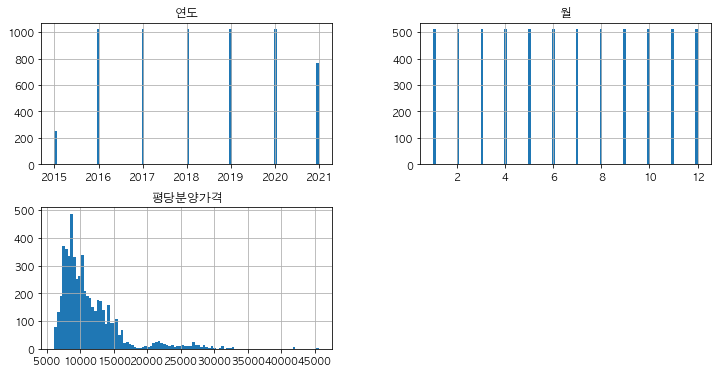

In [32]:
df_last.hist(figsize=(12,6),bins=100)

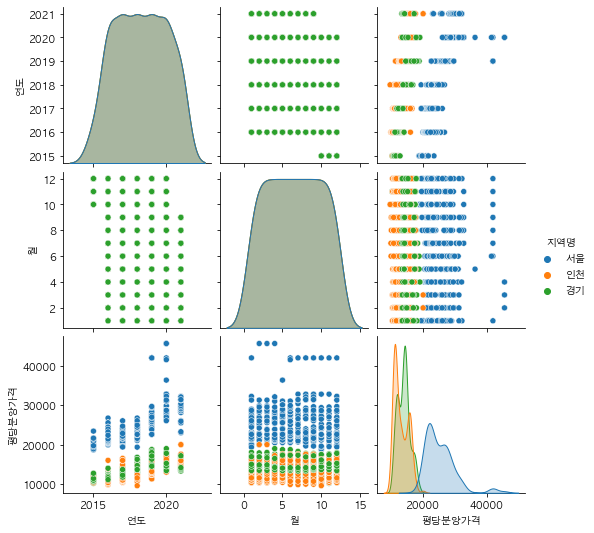

In [34]:

sns.pairplot(data=df_last[df_last['지역명'].isin(['서울','경기','인천'])],hue='지역명')

In [41]:

df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [42]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

In [43]:

df_first.isnull().sum()

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

In [44]:

df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [45]:


df_first_melt = pd.melt(df_first, id_vars=['지역'])

In [46]:
df_first_melt.columns = ["지역명", "기간", "평당분양가격"]

In [48]:
date = "2013년12월"
year = date.split('년')[0]
month = date.split('년')[1].split('월')[0]
year, month

('2013', '12')

In [59]:

def parse_year(date):
    return int(date[:4])

In [53]:

parse_year(date)

'2013'

In [58]:


def parse_month(date):
    return int(date[5:].replace('월',''))

In [55]:

parse_month(date)

'12'

In [60]:
df_first_melt['연도'] = df_first_melt['기간'].apply(parse_year)

In [62]:

df_first_melt['월'] = df_first_melt['기간'].apply(parse_month)
df_first_melt.head()

,지역명,기간,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12
2,대구,2013년12월,8080,2013,12
3,인천,2013년12월,10204,2013,12
4,광주,2013년12월,6098,2013,12


In [65]:

df_first_melt.columns.tolist()

['지역명', '기간', '평당분양가격', '연도', '월']

In [66]:


df_last.columns.tolist()

['지역명', '연도', '월', '평당분양가격', '전용면적']

In [67]:
cols = ['지역명', '연도', '월', '평당분양가격']
cols

['지역명', '연도', '월', '평당분양가격']

In [69]:


df_last_prepare = df_last.loc[df_last['전용면적'] == '모든면적', cols].copy()

In [72]:


df_first_prepare = df_first_melt.loc[:, cols].copy()

In [84]:

df = pd.concat([df_first_prepare,df_last_prepare]).reset_index(drop=True)

In [85]:

df

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189.0
1,부산,2013,12,8111.0
2,대구,2013,12,8080.0
3,인천,2013,12,10204.0
4,광주,2013,12,6098.0
...,...,...,...,...
1576,전북,2021,9,8715.3
1577,전남,2021,9,10487.4
1578,경북,2021,9,10345.5
1579,경남,2021,9,10873.5


In [96]:

df['연도'].value_counts().sort_index()

2013     17
2014    204
2015    187
2016    204
2017    204
2018    204
2019    204
2020    204
2021    153
Name: 연도, dtype: int64

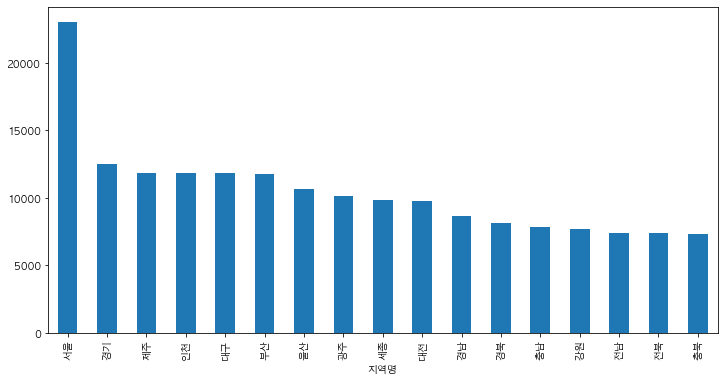

In [110]:

_ = df.groupby(['지역명'])['평당분양가격'].mean().sort_values(ascending=False).plot.bar(figsize=(12,6))

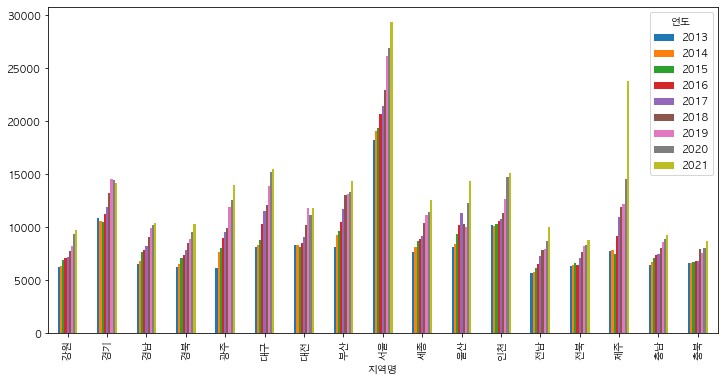

In [113]:
_ = df.groupby(['지역명','연도'])['평당분양가격'].mean().unstack().plot.bar(figsize=(12,6))

In [88]:
df.groupby(['지역명', '연도'])['평당분양가격'].mean()

지역명  연도  
강원   2013    6230.000000
     2014    6332.500000
     2015    6831.154545
     2016    7011.125000
     2017    7170.625000
                ...     
충북   2017    6770.225000
     2018    7874.075000
     2019    7574.600000
     2020    7959.600000
     2021    8634.633333
Name: 평당분양가격, Length: 153, dtype: float64

In [90]:

pd.pivot_table(data=df,index=df['지역명'],values='평당분양가격')

,평당분양가격
지역명,
강원,7701.655914
경기,12477.155914
경남,8661.929032
경북,8163.291398
광주,10114.936559
대구,11799.490323
대전,9779.794624
부산,11729.804301
서울,22991.492473


In [93]:
g = df.groupby(["연도", "지역명"])["평당분양가격"].mean()
g

연도    지역명
2013  강원      6230.000000
      경기     10855.000000
      경남      6473.000000
      경북      6168.000000
      광주      6098.000000
                 ...     
2021  전남      9966.366667
      전북      8784.600000
      제주     23790.800000
      충남      9264.566667
      충북      8634.633333
Name: 평당분양가격, Length: 153, dtype: float64

In [131]:
yg = pd.pivot_table(data=df,index=df['연도'],columns=df['지역명'],values='평당분양가격')
yg.head(2)

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2013,6230.0,10855.000000,6473.00,6168.0,6098.000000,8080.000000,8321.000000,8111.000000,18189.00,7601.000000,8090.000000,10204.000000,5678.000000,6282.000000,7674.000000,6365.000000,6589.0
2014,6332.5,10509.083333,6728.75,6536.5,7587.833333,8286.083333,8240.333333,9180.166667,18997.25,8085.333333,8361.666667,10074.833333,5718.916667,6362.333333,7855.166667,6681.583333,6620.0


<AxesSubplot:xlabel='지역명', ylabel='연도'>

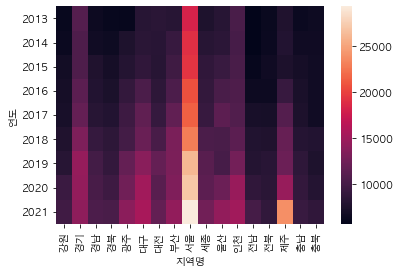

In [115]:

sns.heatmap(yg)

In [116]:

yg = yg.transpose()

<AxesSubplot:xlabel='연도', ylabel='지역명'>

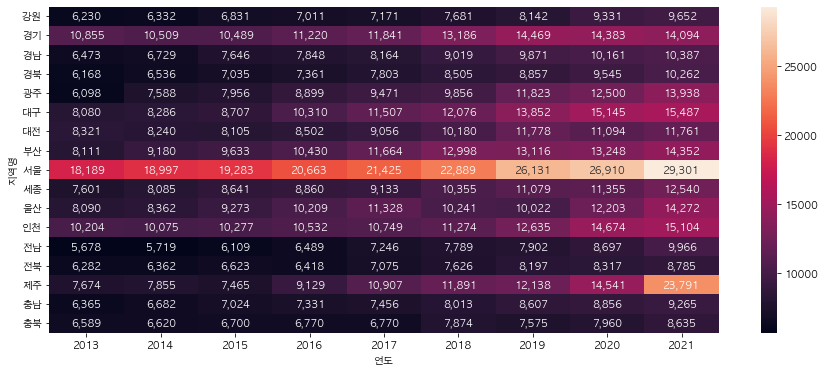

In [120]:
plt.figure(figsize=(15,6))
sns.heatmap(yg, annot=True, fmt=",.0f")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

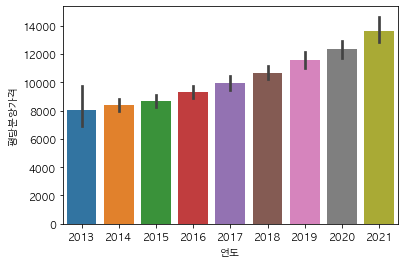

In [174]:
sns.barplot(data=df,x='연도',y='평당분양가격')

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

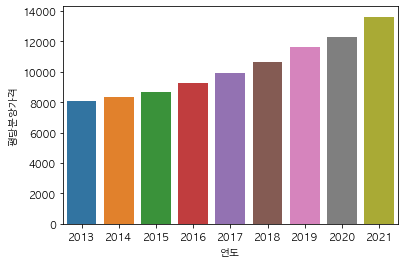

In [175]:
sns.pointplot(data=df,x='연도',y='평당분양가격', ci=None)

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

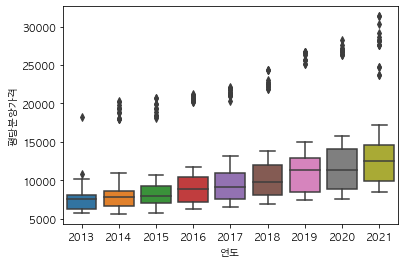

In [177]:
sns.boxplot(data=df,x='연도',y='평당분양가격')

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

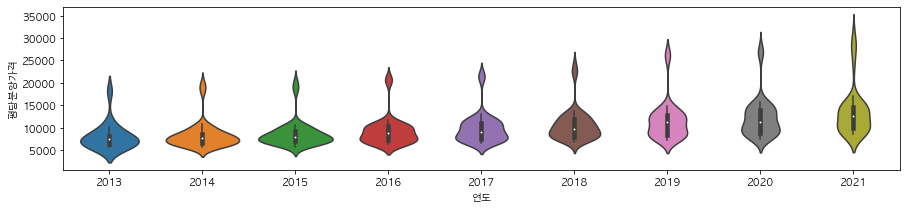

In [179]:
plt.figure(figsize=(15,3))
sns.violinplot(data=df,x='연도',y='평당분양가격')

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

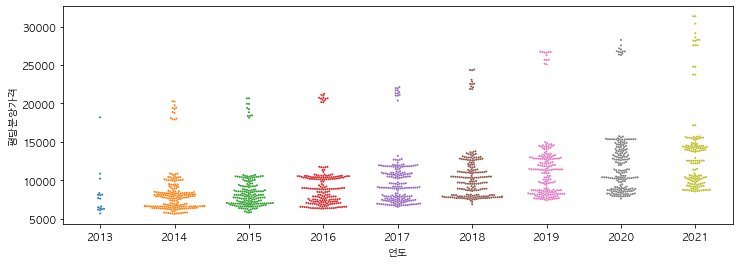

In [183]:
plt.figure(figsize=(12,4))
sns.swarmplot(data=df,x='연도',y='평당분양가격',size=2)

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

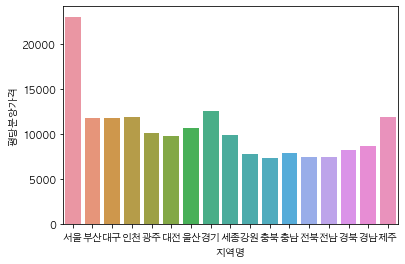

In [190]:

sns.barplot(data=df,x='지역명',y='평당분양가격', ci=None)

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

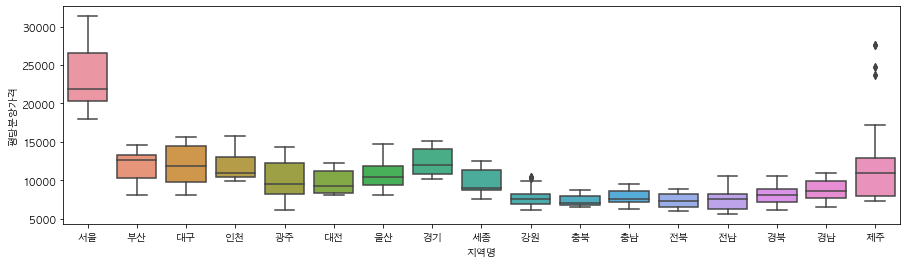

In [192]:
plt.figure(figsize=(15,4))
sns.boxplot(data=df,x='지역명',y='평당분양가격')

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

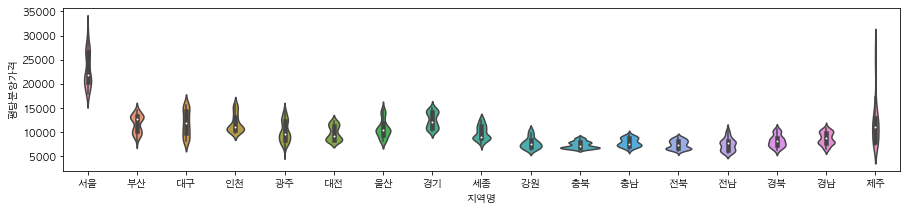

In [187]:
plt.figure(figsize=(15,3))
sns.violinplot(data=df,x='지역명',y='평당분양가격')

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

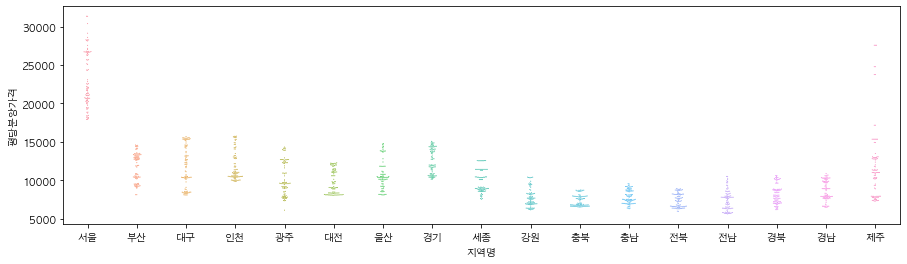

In [197]:
plt.figure(figsize=(15,4))
sns.swarmplot(data=df,x='지역명',y='평당분양가격',size=1)